# Coding Practice Session 5
## Categorical Plots in Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")

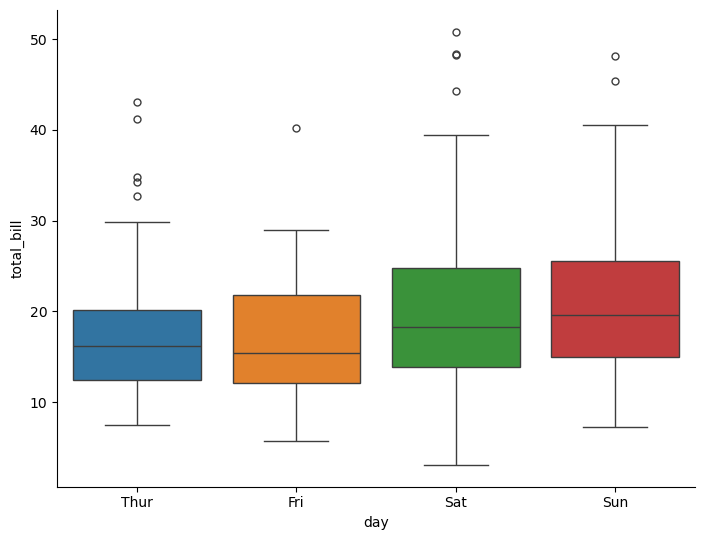

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", kind="box", hue="day", aspect=1.3, height=5.5
)
plt.tight_layout()

### Categorical Scatter plots

In [13]:
penguins = sns.load_dataset("penguins")

In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
len(penguins)  # number of rows

344

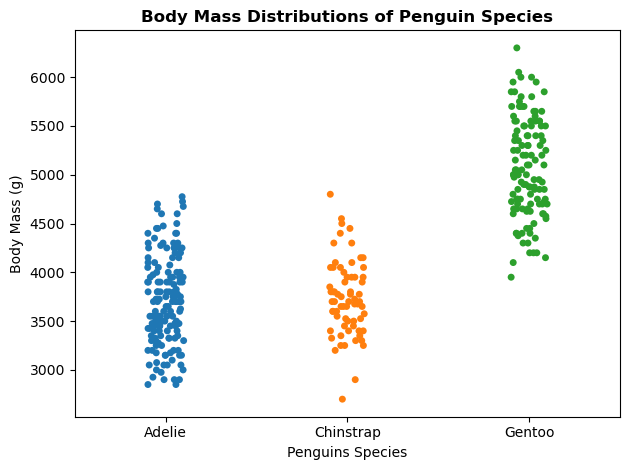

In [24]:
ax = sns.stripplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="species",
    jitter=True,
)
ax.set_title("Body Mass Distributions of Penguin Species", fontweight="bold")
ax.set_xlabel("Penguins Species")
ax.set_ylabel("Body Mass (g)")

plt.tight_layout()

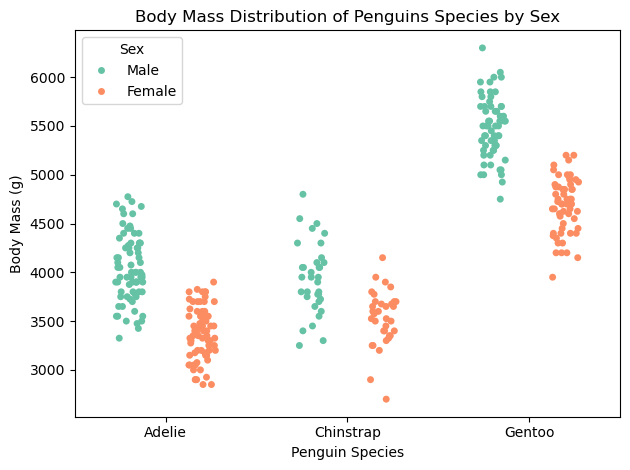

In [ ]:
sns.stripplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="sex",
    dodge=True,
    palette="Set2",
    jitter=0.15,
)
plt.title("Body Mass Distribution of Penguins Species by Sex")
plt.xlabel("Penguin Species")
plt.ylabel("Body Mass (g)")
plt.legend(title="Sex", loc="upper left")
plt.tight_layout()

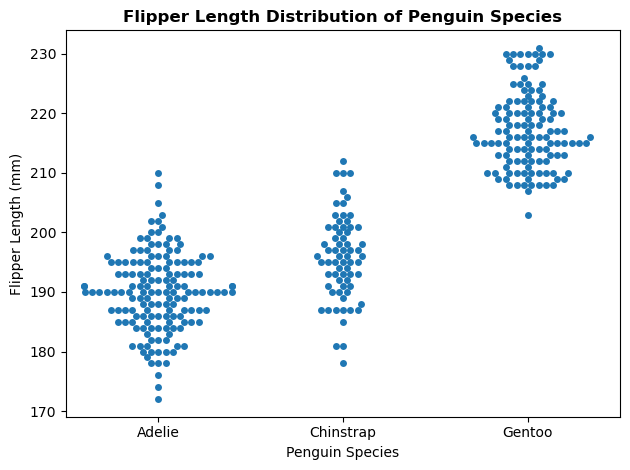

In [38]:
ax = sns.swarmplot(data=penguins, x="species", y="flipper_length_mm", s=5)
ax.set_title("Flipper Length Distribution of Penguin Species", fontweight="bold")
ax.set_xlabel("Penguin Species")
ax.set_ylabel("Flipper Length (mm)")

ax.figure.tight_layout()

### Categorical Distribution Plots

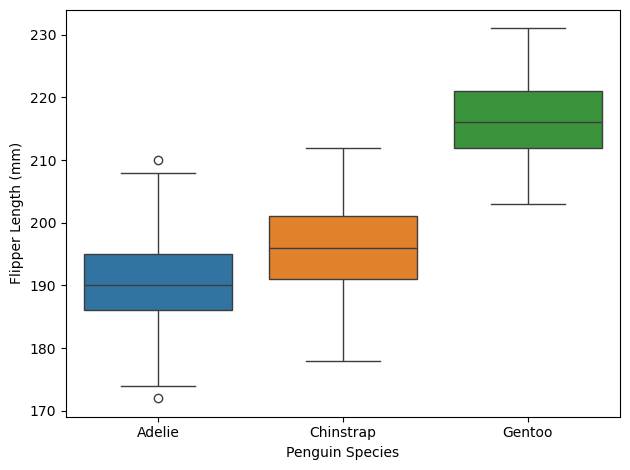

In [42]:
ax = sns.boxplot(data=penguins, x="species", y="flipper_length_mm", hue="species")
ax.set(xlabel="Penguin Species", ylabel="Flipper Length (mm)")

plt.tight_layout()

In [43]:
diamonds = sns.load_dataset("diamonds")

In [44]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [46]:
diamonds.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [48]:
diamonds.duplicated().any()

np.True_

In [50]:
diamonds.drop_duplicates(keep="last", inplace=True)

In [51]:
len(diamonds)

53794

In [57]:
diamonds["cut"].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

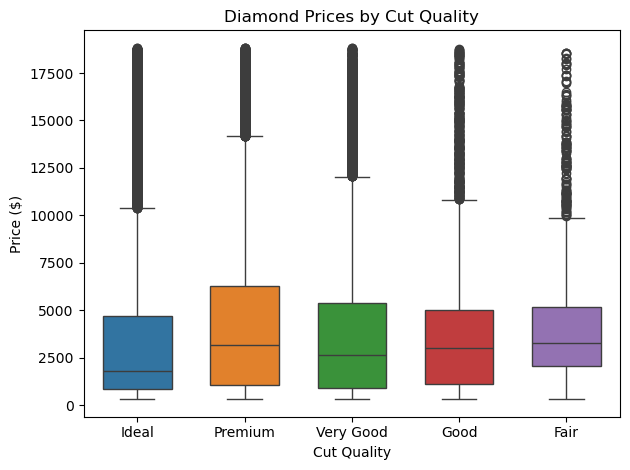

In [ ]:
ax = sns.boxplot(data=diamonds, x="cut", y="price", gap=0.2, hue="cut")
ax.set(title="Diamond Prices by Cut Quality", xlabel="Cut Quality", ylabel="Price ($)")

plt.tight_layout()

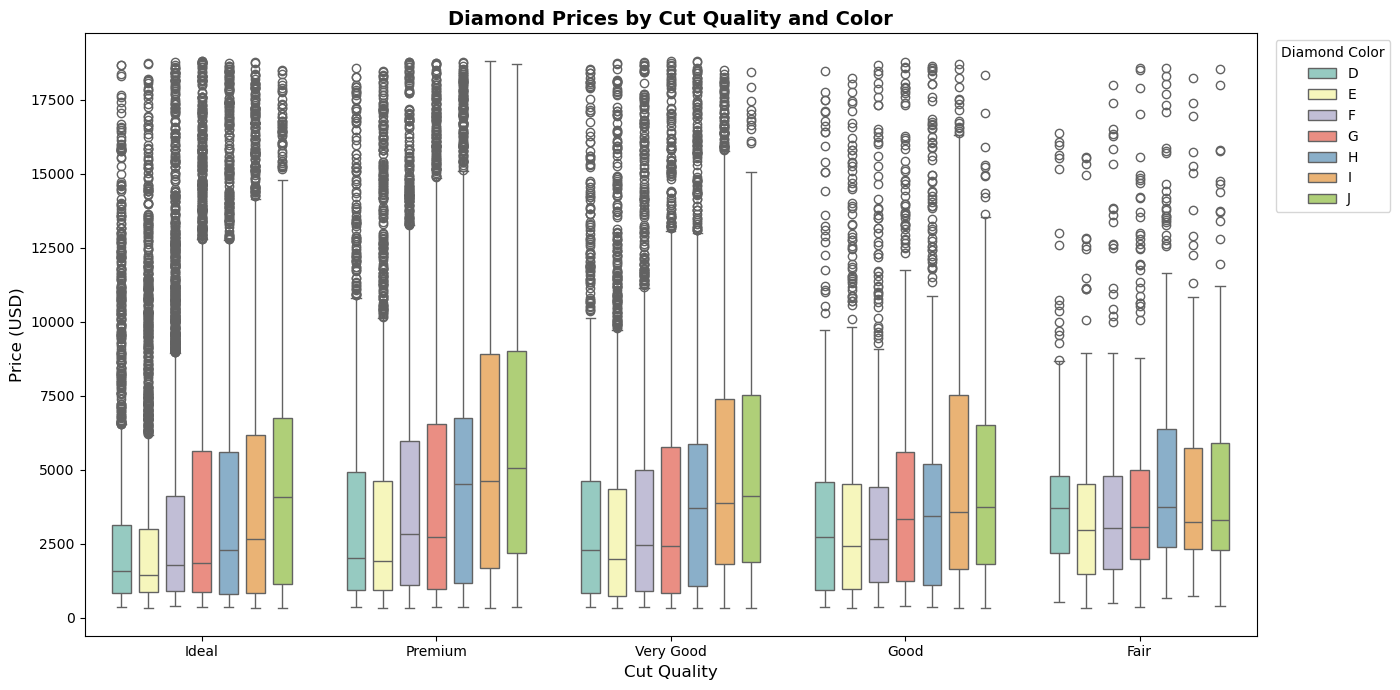

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.boxplot(
    data=diamonds, ax=ax, x="cut", y="price", hue="color", gap=0.3, palette="Set3"
)
ax.set_title("Diamond Prices by Cut Quality and Color", fontweight="bold", fontsize=14)
ax.set_xlabel("Cut Quality", fontsize=12)
ax.set_ylabel("Price (USD)", fontsize=12)
ax.legend(title="Diamond Color", bbox_to_anchor=(1.12, 1), loc="upper right")

fig.tight_layout()

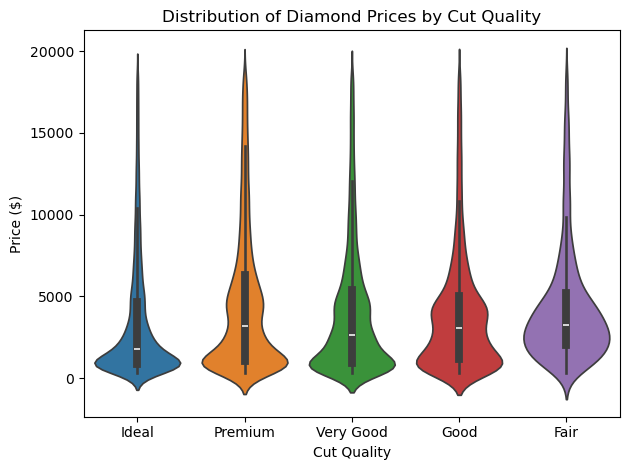

In [80]:
sns.violinplot(data=diamonds, x="cut", y="price", hue="cut")
plt.title("Distribution of Diamond Prices by Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Price ($)")
plt.tight_layout()

In [82]:
diamonds["clarity"].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

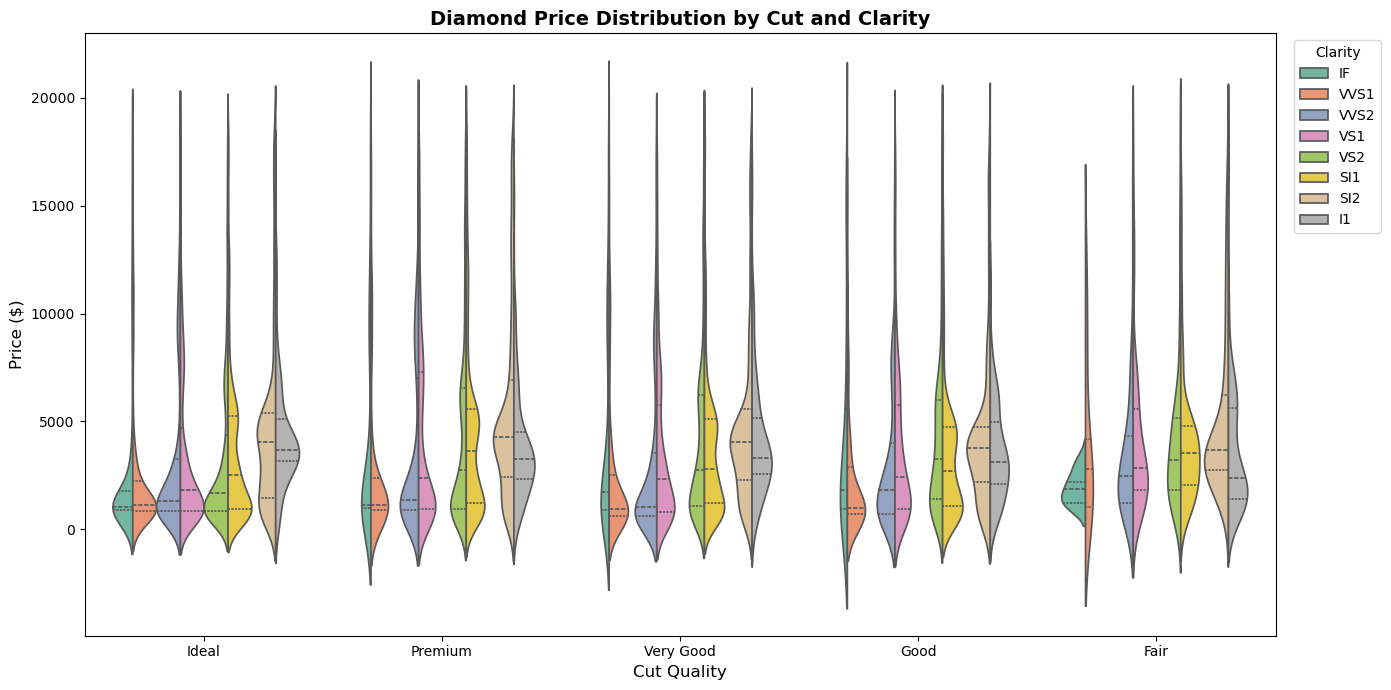

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

title_params = {"fontweight": "bold", "fontsize": 14}

sns.violinplot(
    data=diamonds,
    ax=ax,
    x="cut",
    y="price",
    hue="clarity",
    inner="quartile",
    palette="Set2",
    split=True,
)

ax.set_title("Diamond Price Distribution by Cut and Clarity", **title_params)
ax.set_xlabel("Cut Quality", fontsize=12)
ax.set_ylabel("Price ($)", fontsize=12)
ax.legend(title="Clarity", bbox_to_anchor=(1.01, 1), loc="upper left")

fig.tight_layout()

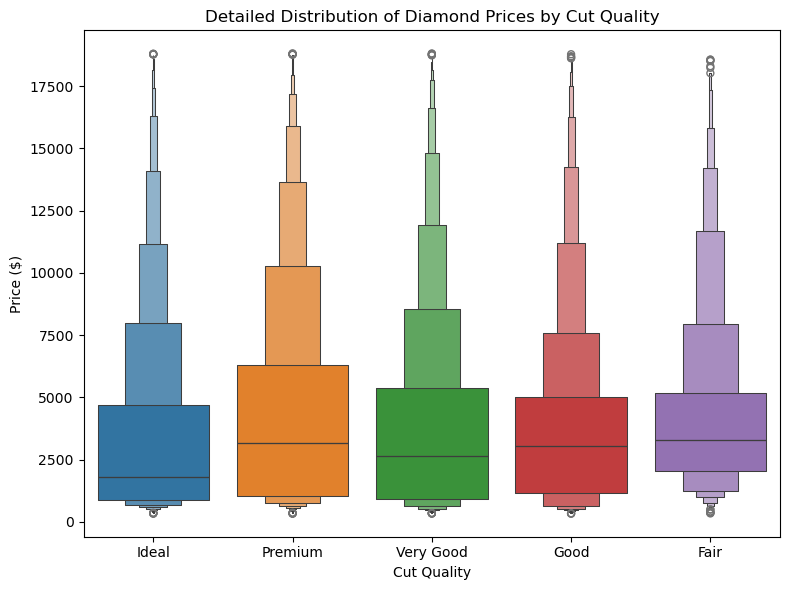

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxenplot(data=diamonds, ax=ax, x="cut", y="price", hue="cut")
ax.set(
    title="Detailed Distribution of Diamond Prices by Cut Quality",
    xlabel="Cut Quality",
    ylabel="Price ($)",
)

fig.tight_layout()

### Categorical Estimate Plots

In [93]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


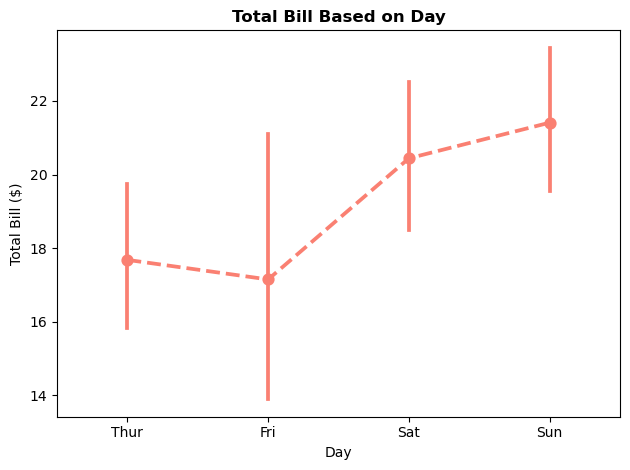

In [101]:
ax = sns.pointplot(data=tips, x="day", y="total_bill", color="salmon", linestyles="--")
ax.set_title("Total Bill Based on Day", fontweight="bold")
ax.set_xlabel("Day")
ax.set_ylabel("Total Bill ($)")

plt.tight_layout()

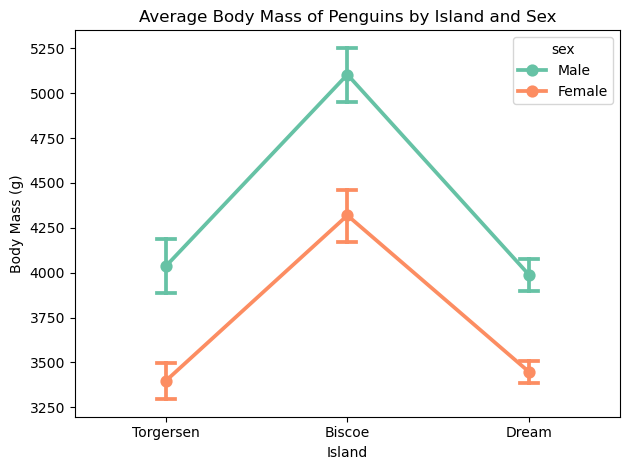

In [ ]:
sns.pointplot(
    data=penguins, x="island", y="body_mass_g", hue="sex", palette="Set2", capsize=0.1
)
plt.title("Average Body Mass of Penguins by Island and Sex")
plt.xlabel("Island")
plt.ylabel("Body Mass (g)")
plt.tight_layout()

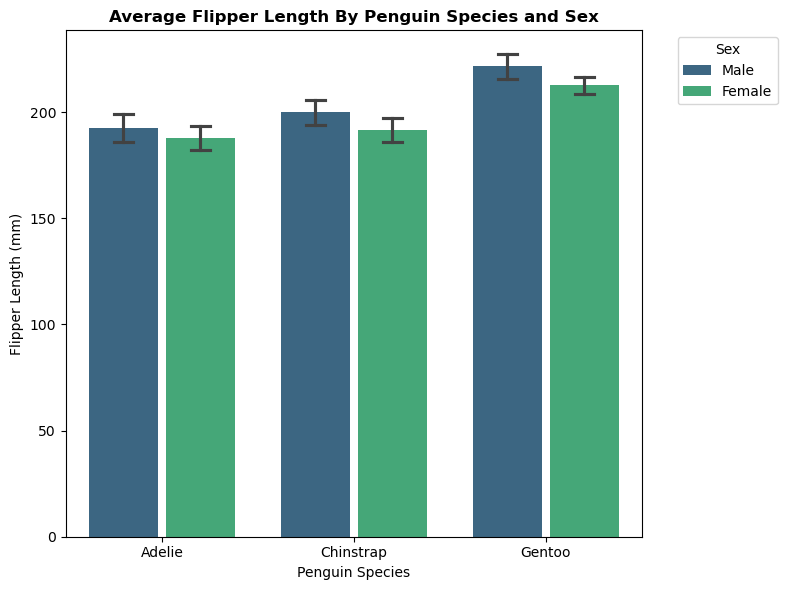

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=penguins,
    x="species",
    y="flipper_length_mm",
    errorbar=("sd"),
    capsize=0.2,
    hue="sex",
    palette="viridis",
    gap=0.1,
)

ax.legend(title="Sex", bbox_to_anchor=(1.05, 1))
ax.set_title("Average Flipper Length By Penguin Species and Sex", fontweight="bold")
ax.set_xlabel("Penguin Species")
ax.set_ylabel("Flipper Length (mm)")

plt.tight_layout()

In [109]:
titanic = sns.load_dataset("titanic")

In [110]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [111]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [113]:
titanic.isna().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [117]:
mean_age = titanic["age"].mean()
titanic.fillna({"age": mean_age}, inplace=True)

In [128]:
titanic[["sex", "survived"]].value_counts()

sex     survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

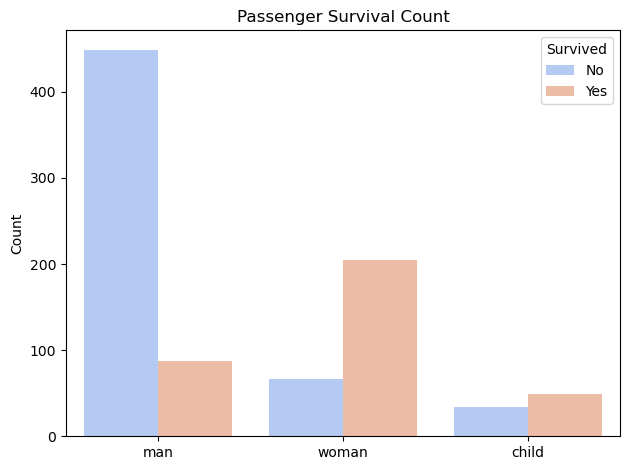

In [ ]:
ax = sns.countplot(
    data=titanic,
    x="who",
    hue="survived",
    palette="coolwarm",
)

ax.set(title="Passenger Survival Count", xlabel=None, ylabel="Count")
ax.legend(title="Survived", labels=["No", "Yes"])

plt.tight_layout()

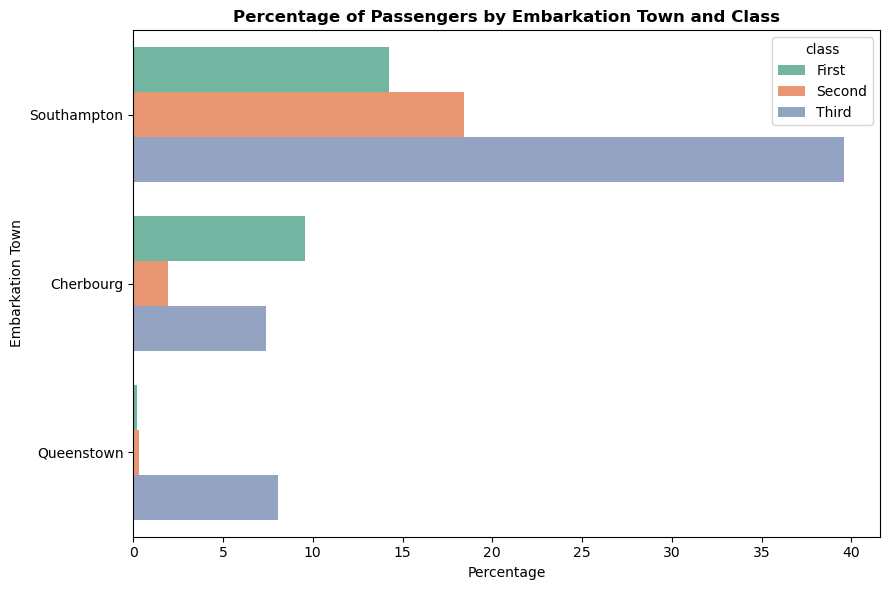

In [145]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(
    data=titanic,
    y="embark_town",
    hue="class",
    palette="Set2",
    order=titanic["embark_town"].value_counts().index,
    stat="percent",
)

ax.set_title("Percentage of Passengers by Embarkation Town and Class", fontweight="bold")
ax.set(xlabel="Percentage", ylabel="Embarkation Town")

plt.tight_layout()

### Combining Categorical Plots

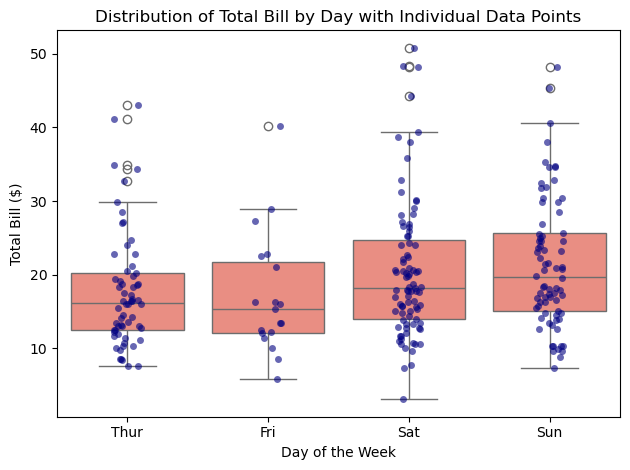

In [149]:
fig, ax = plt.subplots()
sns.boxplot(data=tips, ax=ax, x="day", y="total_bill", color="salmon")
sns.stripplot(data=tips, ax=ax, x="day", y="total_bill", alpha=0.6, color="navy")
ax.set(
    title="Distribution of Total Bill by Day with Individual Data Points",
    xlabel="Day of the Week",
    ylabel="Total Bill ($)",
)

fig.tight_layout()

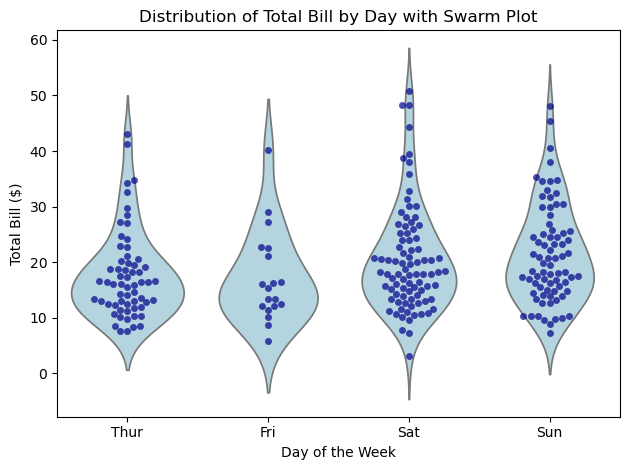

In [154]:
sns.violinplot(data=tips, x="day", y="total_bill", inner=None, color="lightblue")
sns.swarmplot(data=tips, x="day", y="total_bill", color="darkblue", alpha=0.7)

plt.title("Distribution of Total Bill by Day with Swarm Plot")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.tight_layout()

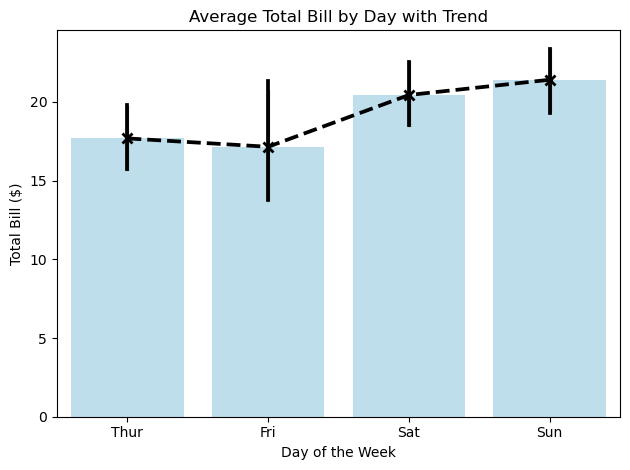

In [165]:
sns.barplot(data=tips, x="day", y="total_bill", alpha=0.6, color="skyblue")
sns.pointplot(data=tips, x="day", y="total_bill", color="black", markers="x", linestyles="--")

plt.title("Average Total Bill by Day with Trend")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.tight_layout()

### Figure-level Interface

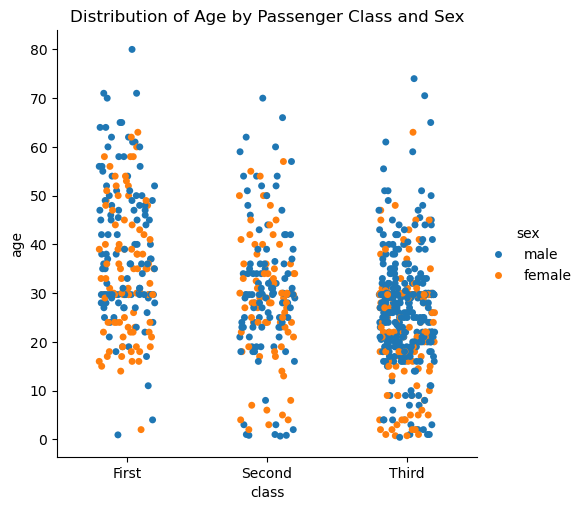

In [179]:
g = sns.catplot(data=titanic, x="class", y="age", jitter=0.2, hue="sex")
g.ax.set_title("Distribution of Age by Passenger Class and Sex");

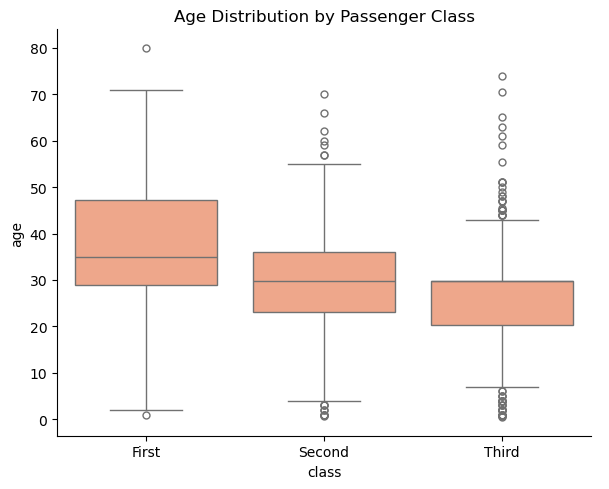

In [183]:
sns.catplot(data=titanic, x="class", y="age", kind="box", color="lightsalmon", aspect=1.2)
plt.title("Age Distribution by Passenger Class")

plt.tight_layout()

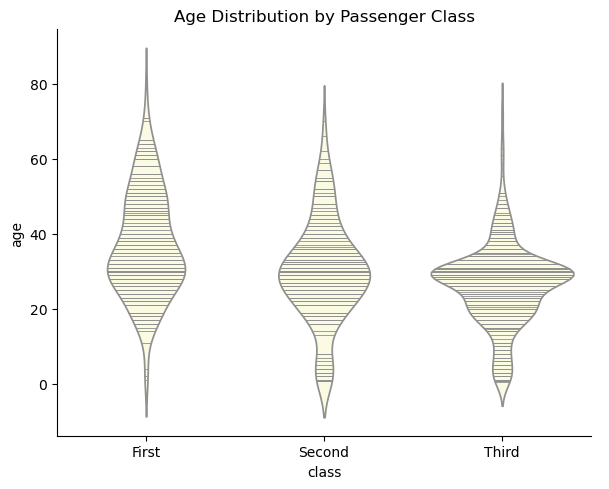

In [187]:
sns.catplot(
    data=titanic,
    x="class",
    y="age",
    kind="violin",
    color="lightyellow",
    aspect=1.2,
    inner="stick"
)
plt.title("Age Distribution by Passenger Class")

plt.tight_layout()

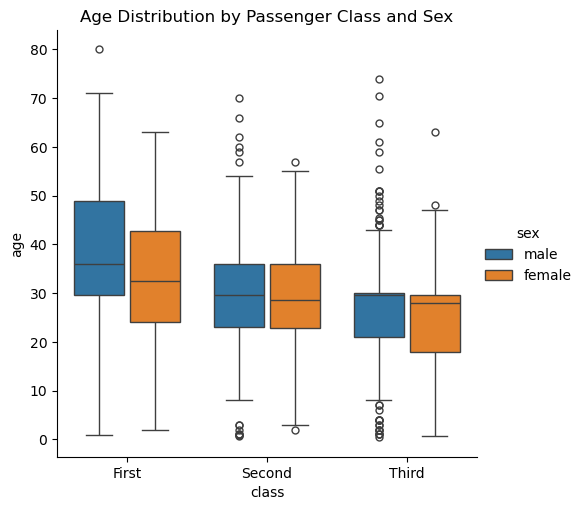

In [191]:
sns.catplot(data=titanic, x="class", y="age", hue="sex", kind="box", gap=0.1)
_ = plt.title("Age Distribution by Passenger Class and Sex")

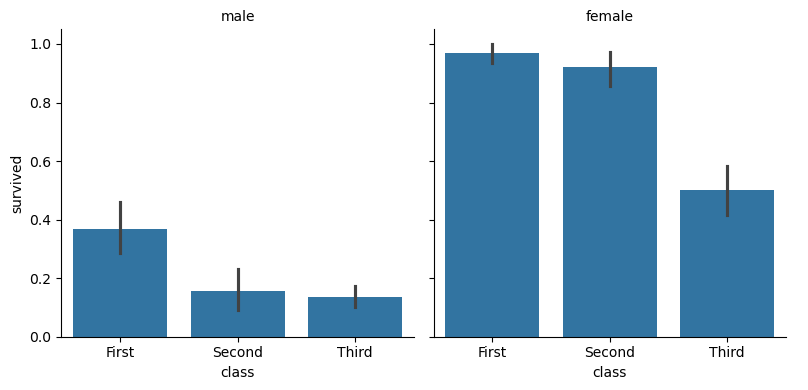

In [201]:
g = sns.catplot(
    data=titanic,
    x="class",
    y="survived",
    col="sex",
    kind="bar",
    height=4,
)
g.set_axis_labels(ylabel="Survival Rate", xlabel="Passenger Class")
_ = g.set_titles("{col_name}")

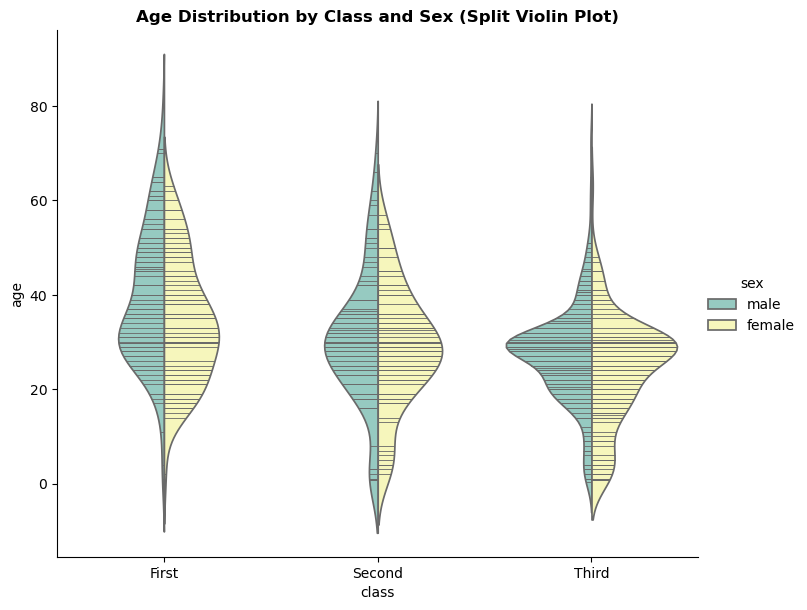

In [ ]:
g = sns.catplot(
    data=titanic,
    x="class",
    y="age",
    hue="sex",
    kind="violin",
    split=True,
    inner="stick",
    height=6,
    aspect=1.2,
    palette="Set3",
)

_ = plt.title("Age Distribution by Class and Sex (Split Violin Plot)", fontweight="bold")